In [1]:
#Importamos librerias de machine learning
from sklearn import svm
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats.stats import pearsonr
import matplotlib.image as mpimg
from collections import Counter

In [2]:
propinas = pd.read_csv('tips.csv')

In [3]:
propinas.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


array([<AxesSubplot:ylabel='sex'>], dtype=object)

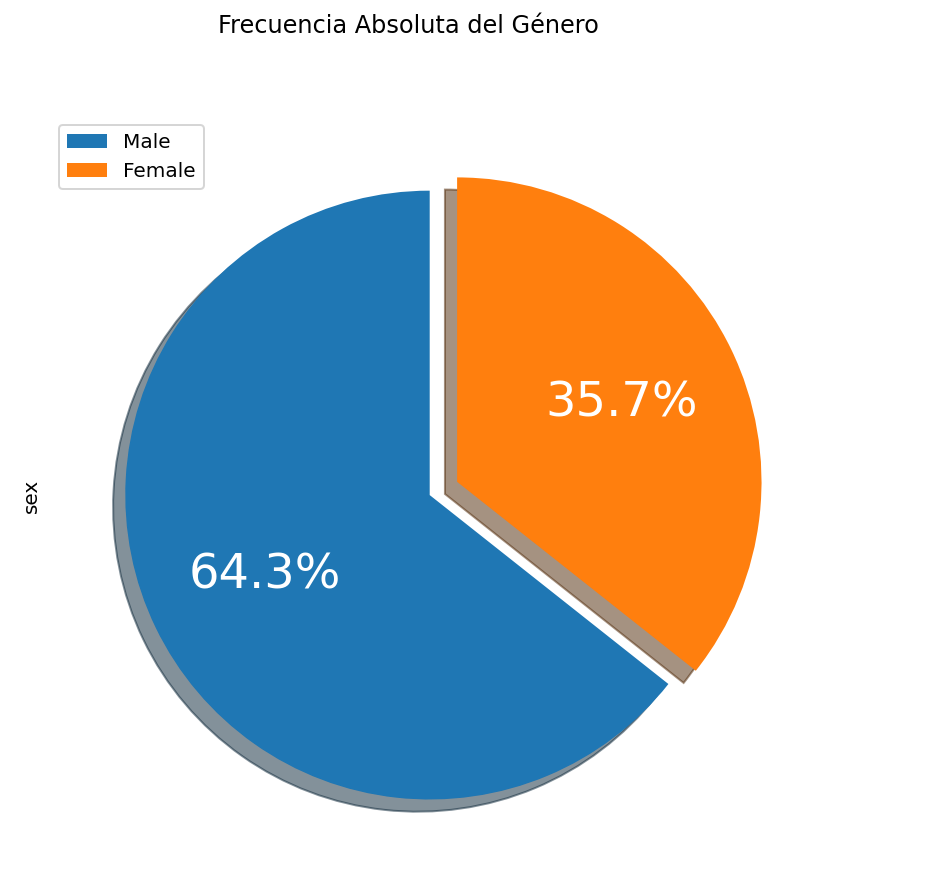

In [4]:
#FRECUENCIA ABSOLUTA SEX ------------------------------------------------------------------------------------------
sex=propinas['sex'].value_counts().to_frame()
sex.plot.pie(subplots=True,autopct='%1.1f%%',shadow=True,explode=(0,0.1),startangle=90,title="Frecuencia Absoluta del Género",textprops=dict(color="w",fontsize=24))

array([<AxesSubplot:ylabel='smoker'>], dtype=object)

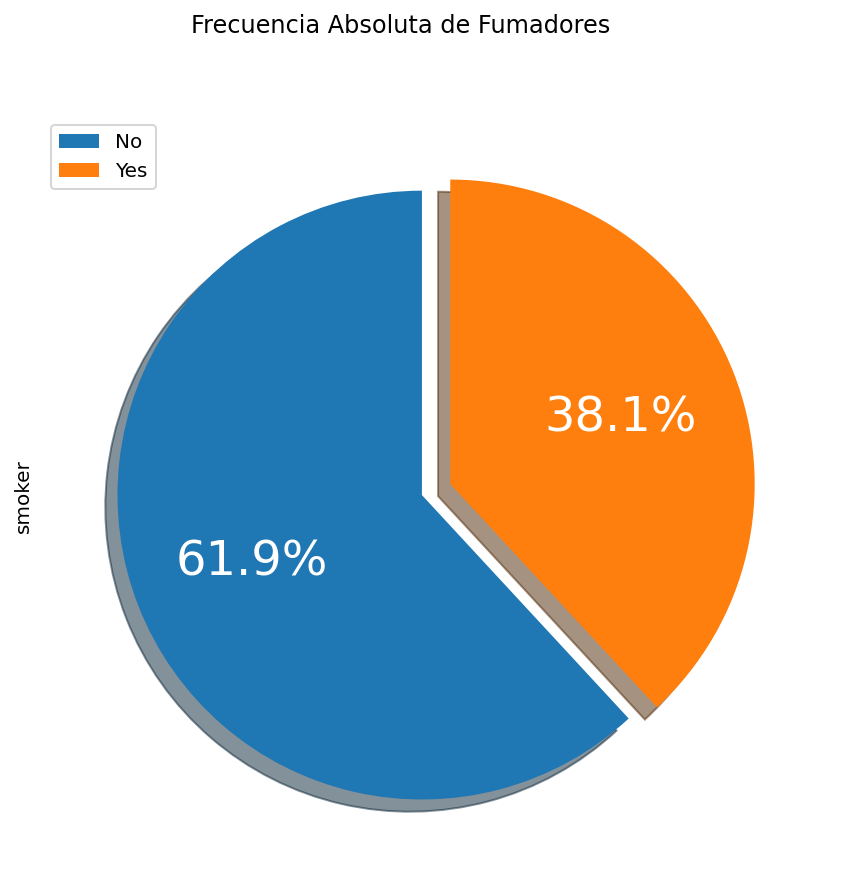

In [5]:
#FRECUENCIA ABSOLUTA SMOKER ------------------------------------------------------------------------------------------
smoke=propinas['smoker'].value_counts().to_frame()
smoke
smoke.plot.pie(subplots=True,autopct='%1.1f%%',shadow=True,explode=(0,0.1),startangle=90,title="Frecuencia Absoluta de Fumadores",textprops=dict(color="w",fontsize=24))

array([<AxesSubplot:ylabel='day'>], dtype=object)

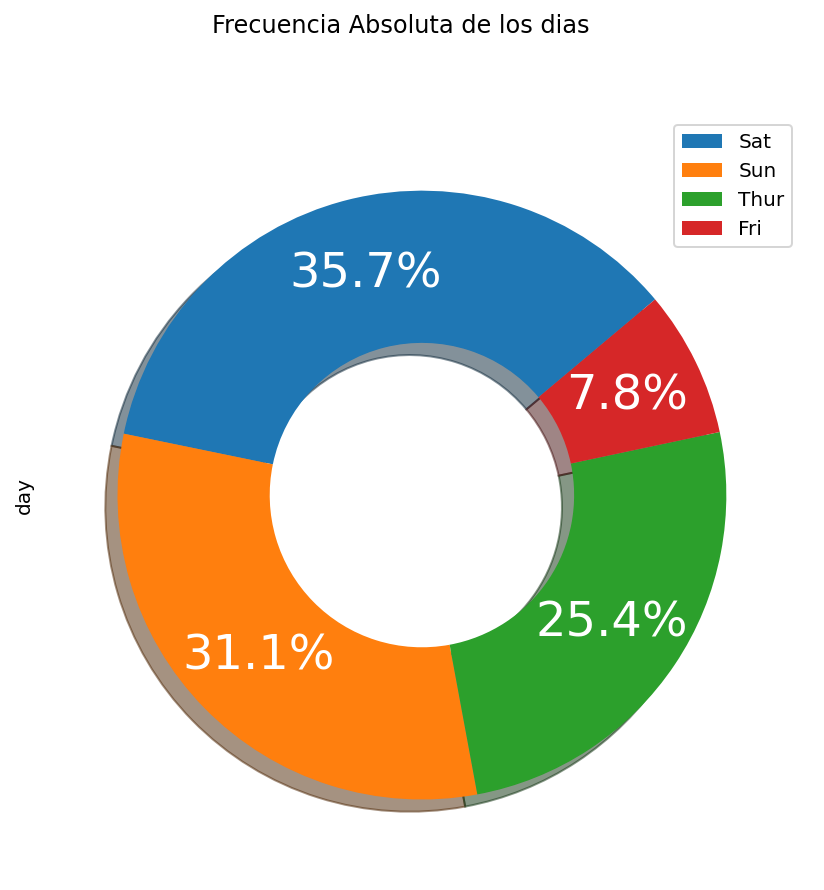

In [6]:
#FRECUENCIA ABSOLUTA DAY ------------------------------------------------------------------------------------------
dia=propinas['day'].value_counts().to_frame()
dia
dia.plot.pie(subplots=True,autopct='%1.1f%%',shadow=True,startangle=40,title="Frecuencia Absoluta de los dias",wedgeprops=dict(width=0.5),pctdistance=0.75,textprops=dict(color="w",fontsize=24))

array([<AxesSubplot:ylabel='time'>], dtype=object)

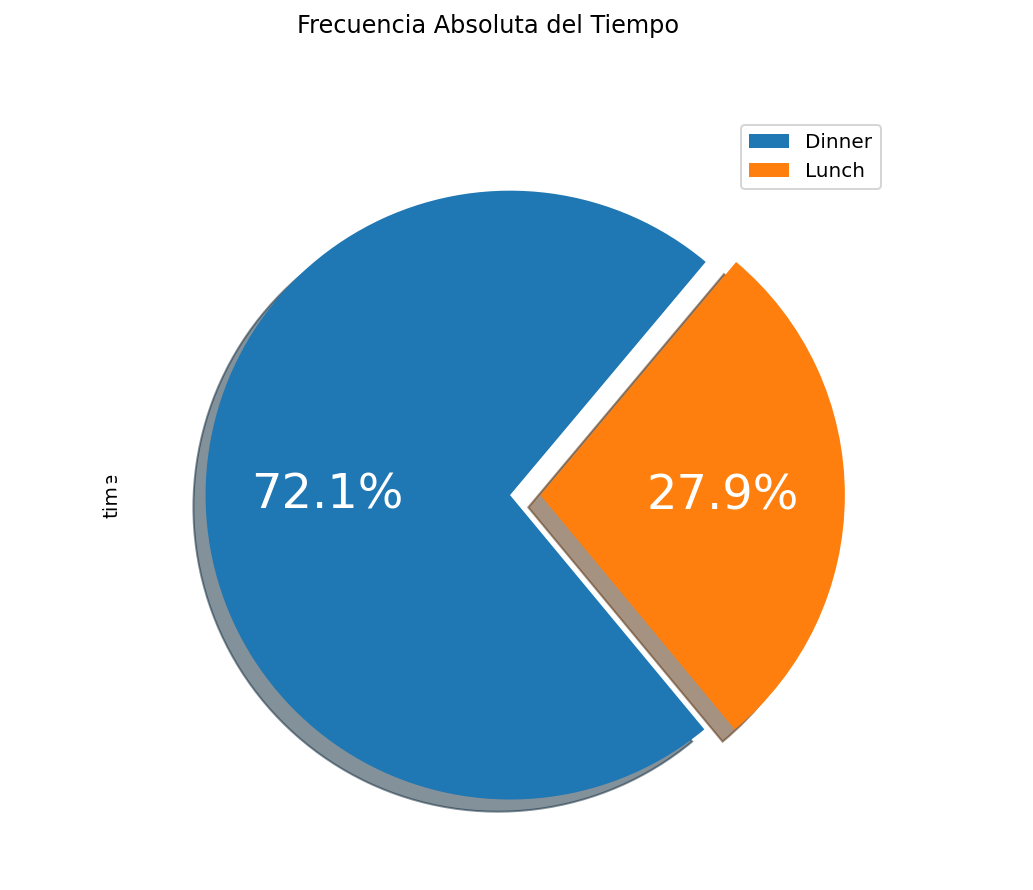

In [7]:
#FRECUENCIA ABSOLUTA TIME ------------------------------------------------------------------------------------------
comida=propinas['time'].value_counts().to_frame()
comida
comida.plot.pie(subplots=True,autopct='%1.1f%%',shadow=True,explode=(0,0.1),startangle=50,title="Frecuencia Absoluta del Tiempo",textprops=dict(color="w",fontsize=24))

<AxesSubplot:title={'center':'Frecuencia del tamaño'}, xlabel='Tamaño', ylabel='Frecuencia'>

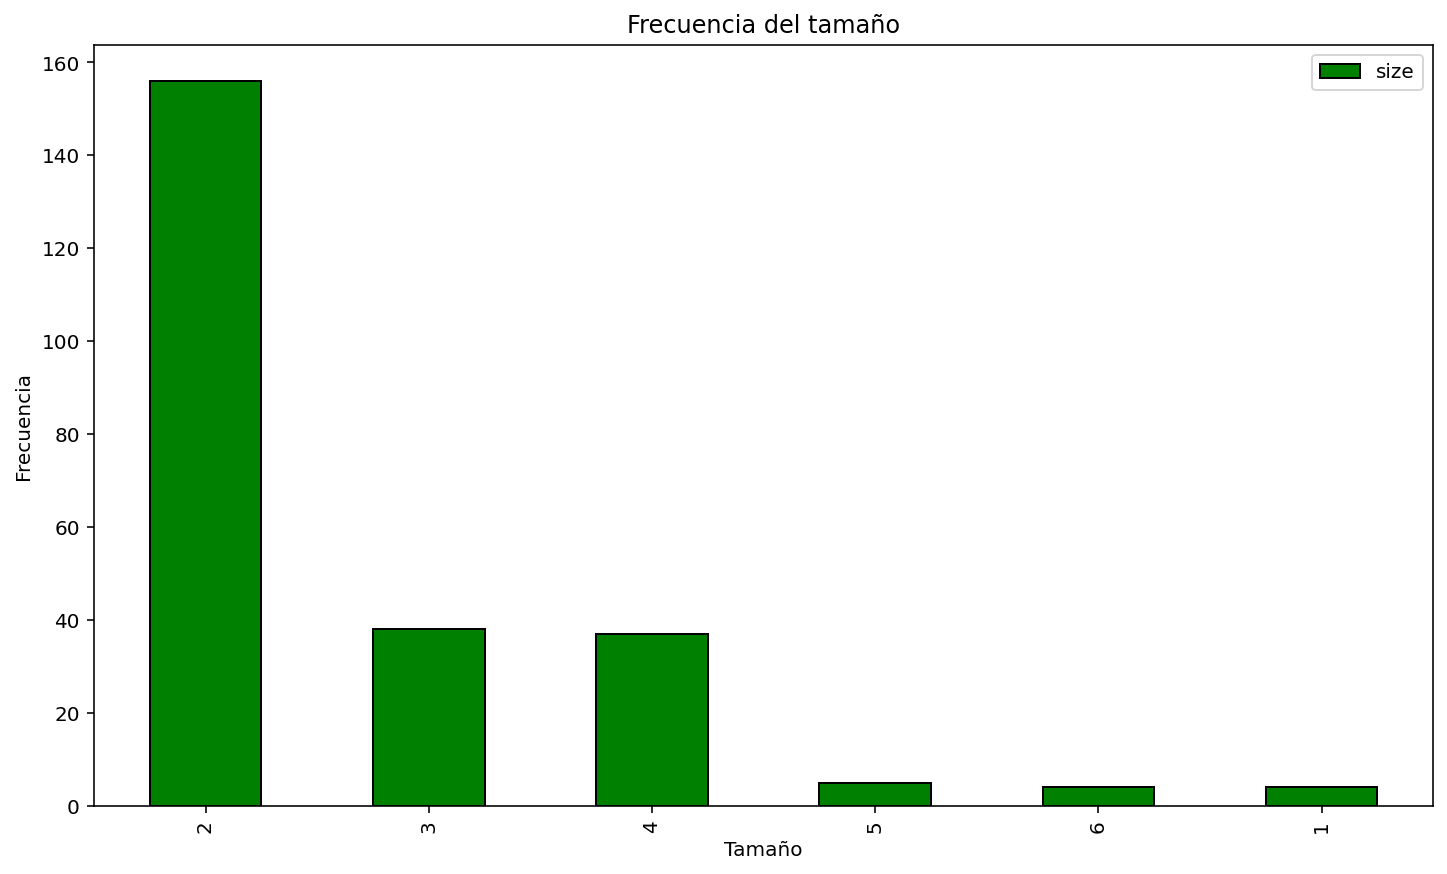

In [8]:
#FRECUENCIA ABSOLUTA SIZE ------------------------------------------------------------------------------------------
tam=propinas['size'].value_counts().to_frame()
tam.plot.bar(ylabel="Frecuencia",xlabel="Tamaño",color="green",edgecolor="black",title="Frecuencia del tamaño")

In [9]:
#FRECUENCIA TOTAL
total_freq=sex['sex'].sum()
total_freq

244

In [10]:
#METODO PARA CALCULAR LA FRECUENCIA RELATIVA
def freq_relativa(x):
    return np.round(x/total_freq)

In [11]:
#sns.set()
#tips = sns.load_dataset("tips")
#sns.relplot(x="total_bill", y="tip", col="time",
#            hue="smoker", style="smoker", size="size",
#            data=tips);

In [12]:
propinas.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:>

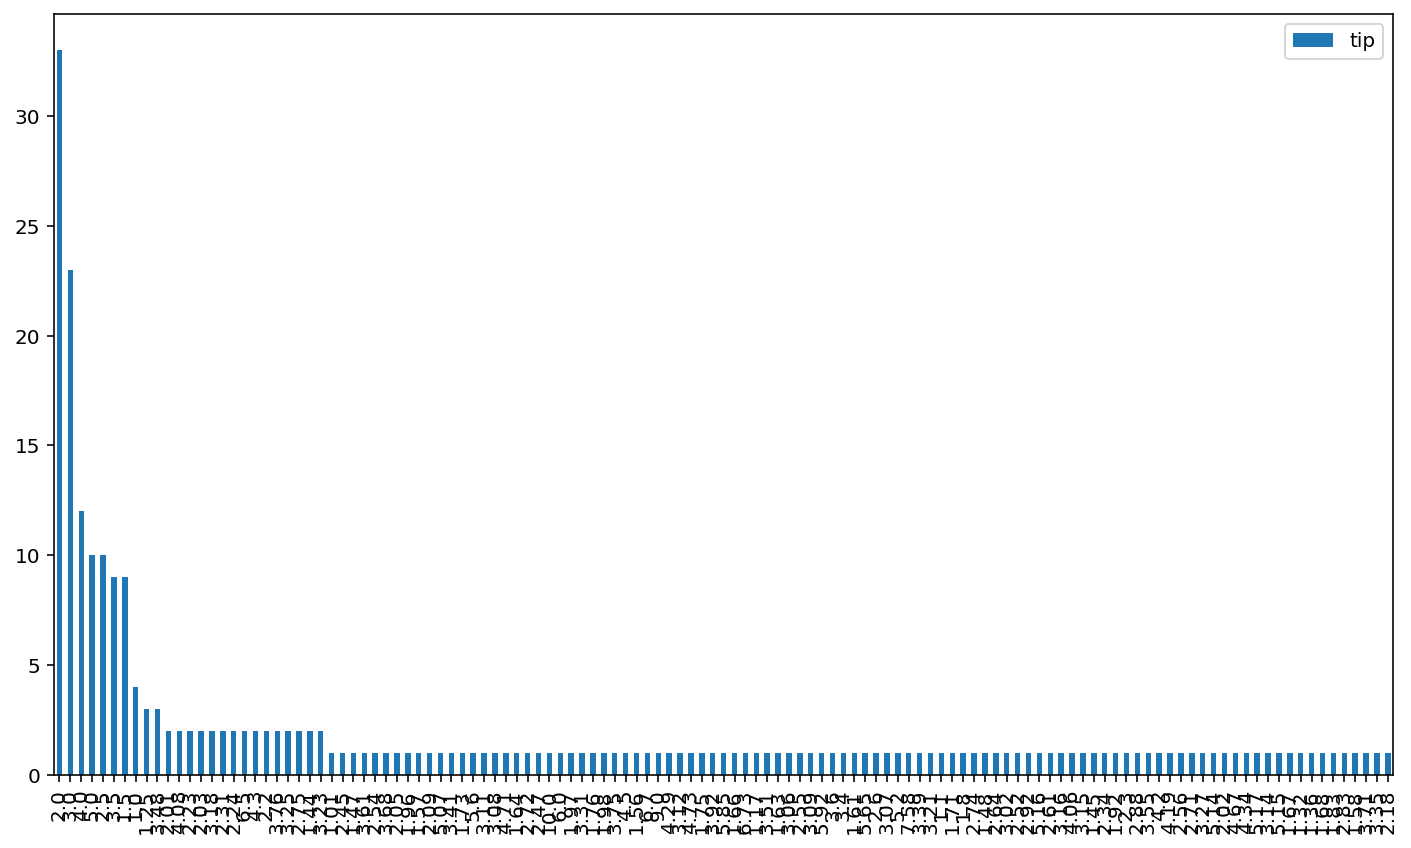

In [13]:
#FRECUENCIA ABSOLUTA
freq_abs_tip=propinas['tip'].value_counts().to_frame()
freq_abs_tip
#ax = sns.swarmplot(data=freq_abs_tip,x="tip")
freq_abs_tip.plot.bar()

In [14]:
freq_relativa(freq_abs_tip['tip'])

2.00    0.0
3.00    0.0
4.00    0.0
5.00    0.0
2.50    0.0
       ... 
2.83    0.0
1.58    0.0
3.71    0.0
3.35    0.0
2.18    0.0
Name: tip, Length: 123, dtype: float64

<AxesSubplot:xlabel='tip'>

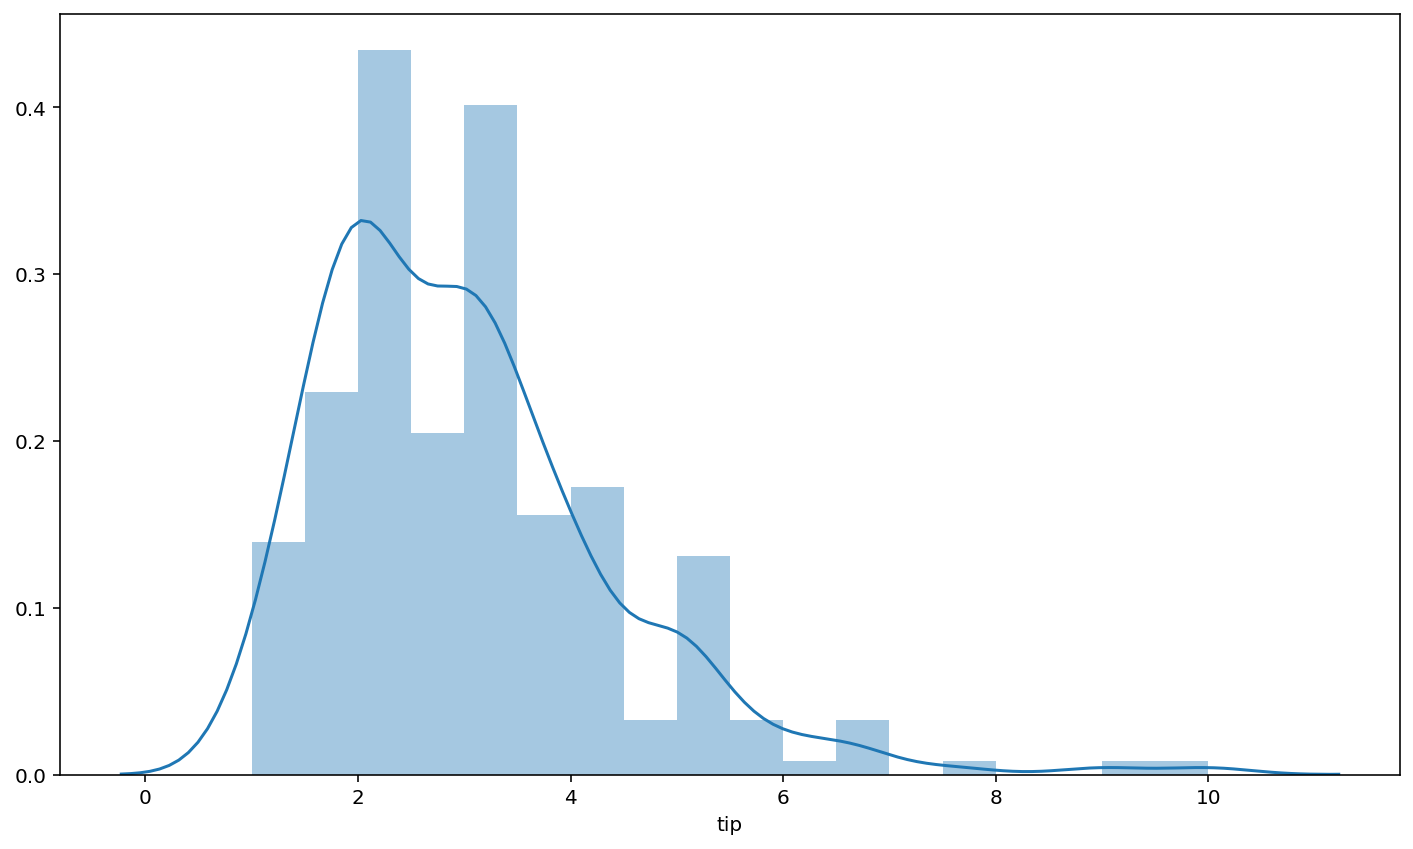

In [15]:
sns.distplot(propinas["tip"])

In [16]:
male = propinas.loc[propinas["sex"] == "Male", ["sex", "tip"]]
female = propinas.loc[propinas["sex"] == "Female", ["sex", "tip"]]

<AxesSubplot:xlabel='tip'>

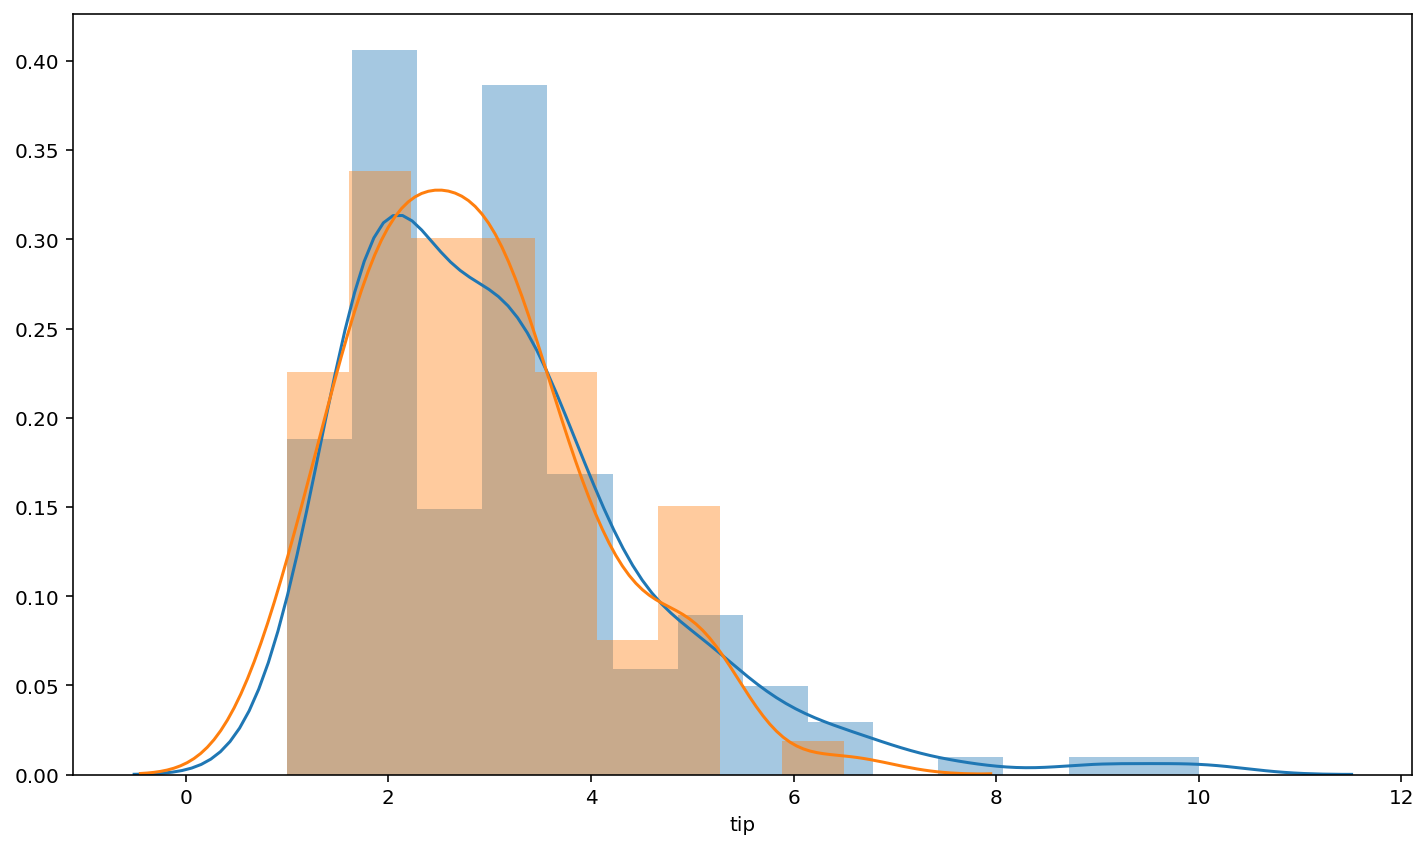

In [17]:
sns.distplot(male["tip"])
sns.distplot(female["tip"])

<AxesSubplot:xlabel='sex', ylabel='tip'>

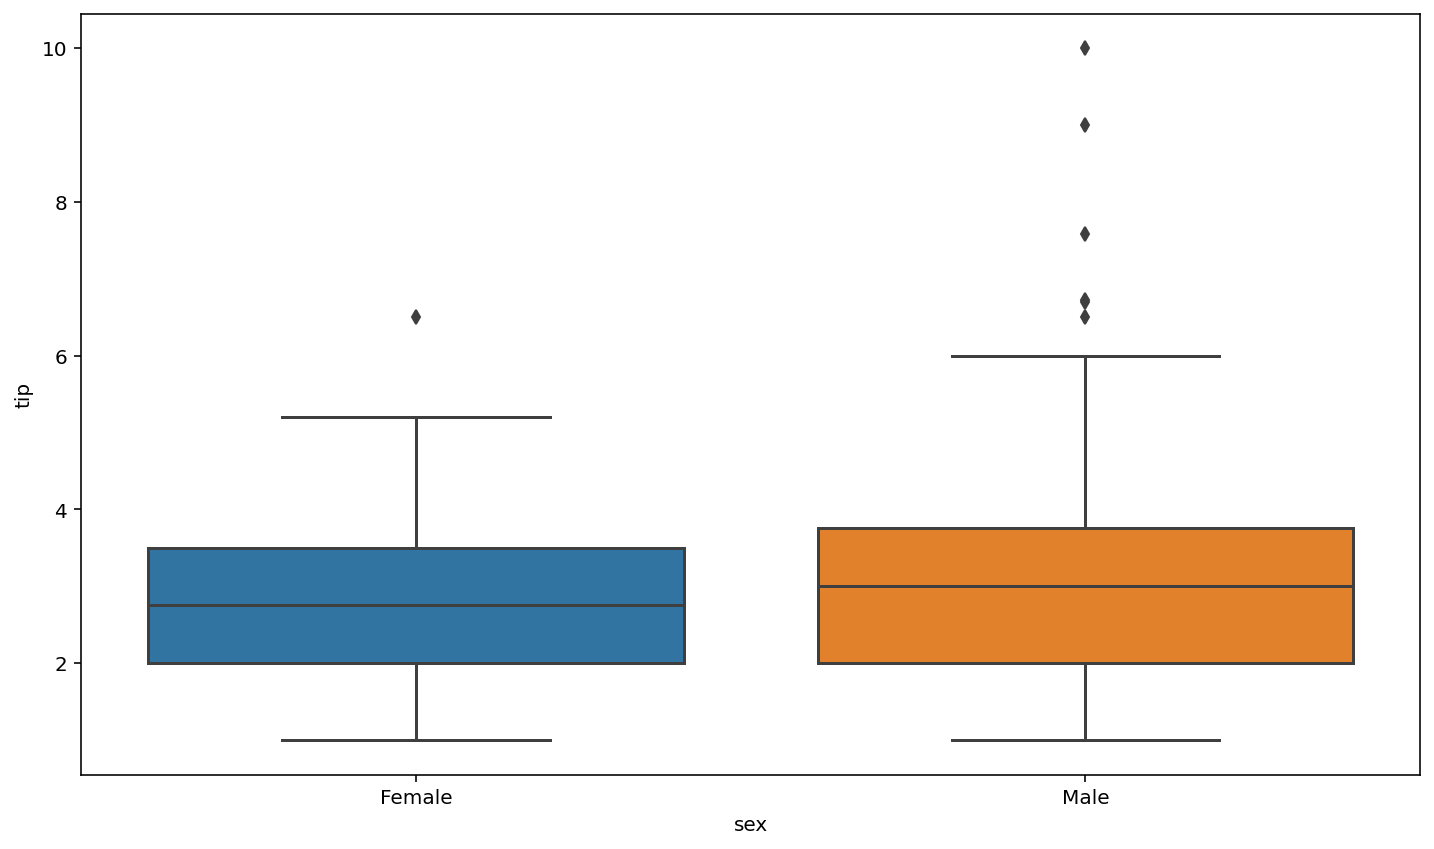

In [18]:
sns.boxplot(x = "sex",y = "tip", data = propinas)

In [19]:
df = pd.DataFrame(data=propinas[["tip","total_bill","sex"]])
df["sex"]=df["sex"].astype('category').cat.codes
df.head()

,tip,total_bill,sex
0,1.01,16.99,0
1,1.66,10.34,1
2,3.50,21.01,1
3,3.31,23.68,1
4,3.61,24.59,0


In [20]:
m=df.corr(method="pearson")
m

,tip,total_bill,sex
tip,1.000000,0.675734,0.088862
total_bill,0.675734,1.000000,0.144877
sex,0.088862,0.144877,1.000000


In [21]:
m=df.corr(method="spearman")
m

,tip,total_bill,sex
tip,1.000000,0.678968,0.055982
total_bill,0.678968,1.000000,0.147717
sex,0.055982,0.147717,1.000000


	Matriz de Correlación


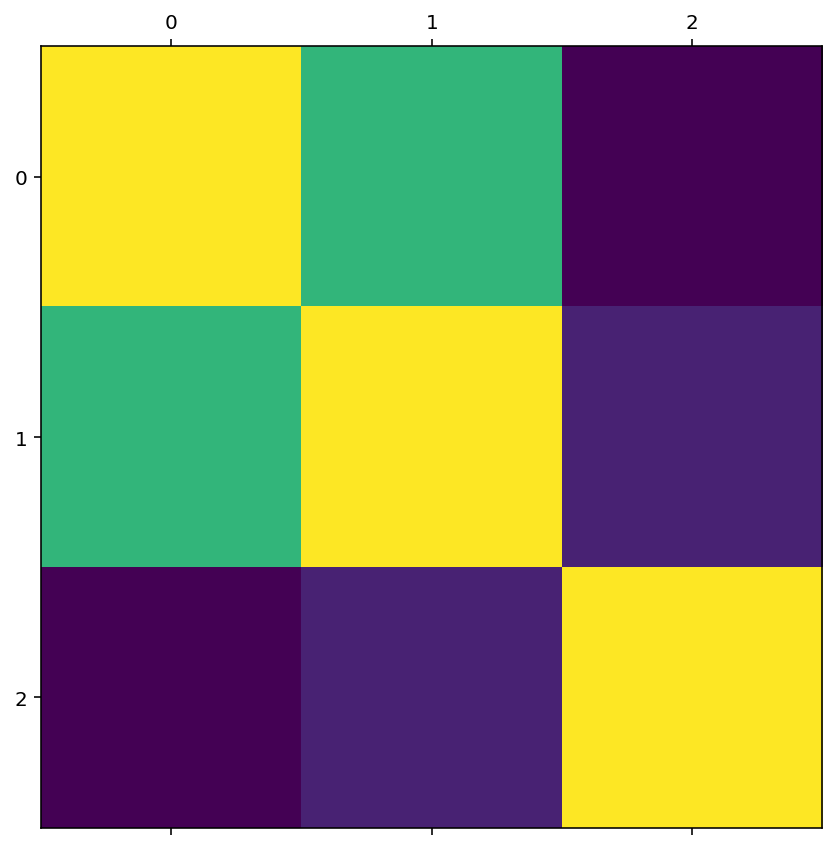

In [22]:
print("\tMatriz de Correlación")
plt.matshow(m)

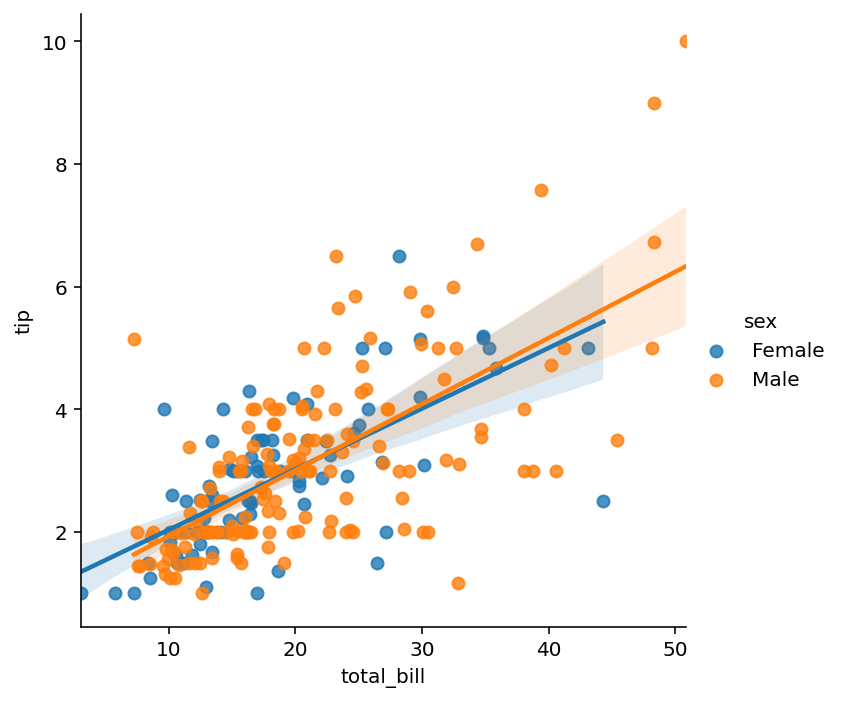

In [23]:
sns.lmplot(y="tip",x="total_bill",hue="sex",data=propinas)

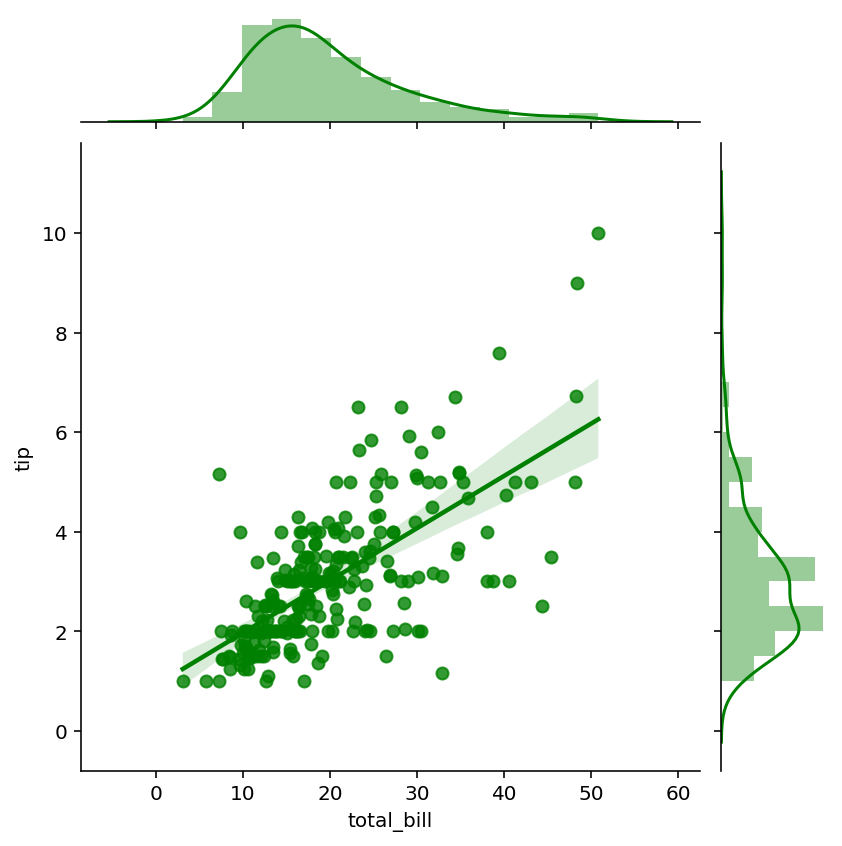

In [24]:
sns.jointplot("total_bill","tip",data=propinas,kind="reg",color="g")

In [25]:
propinas.corr(method="pearson")

,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [26]:
corr, valor_p = pearsonr(propinas["tip"],propinas["total_bill"])
corr, valor_p

(0.6757341092113647, 6.6924706468630016e-34)

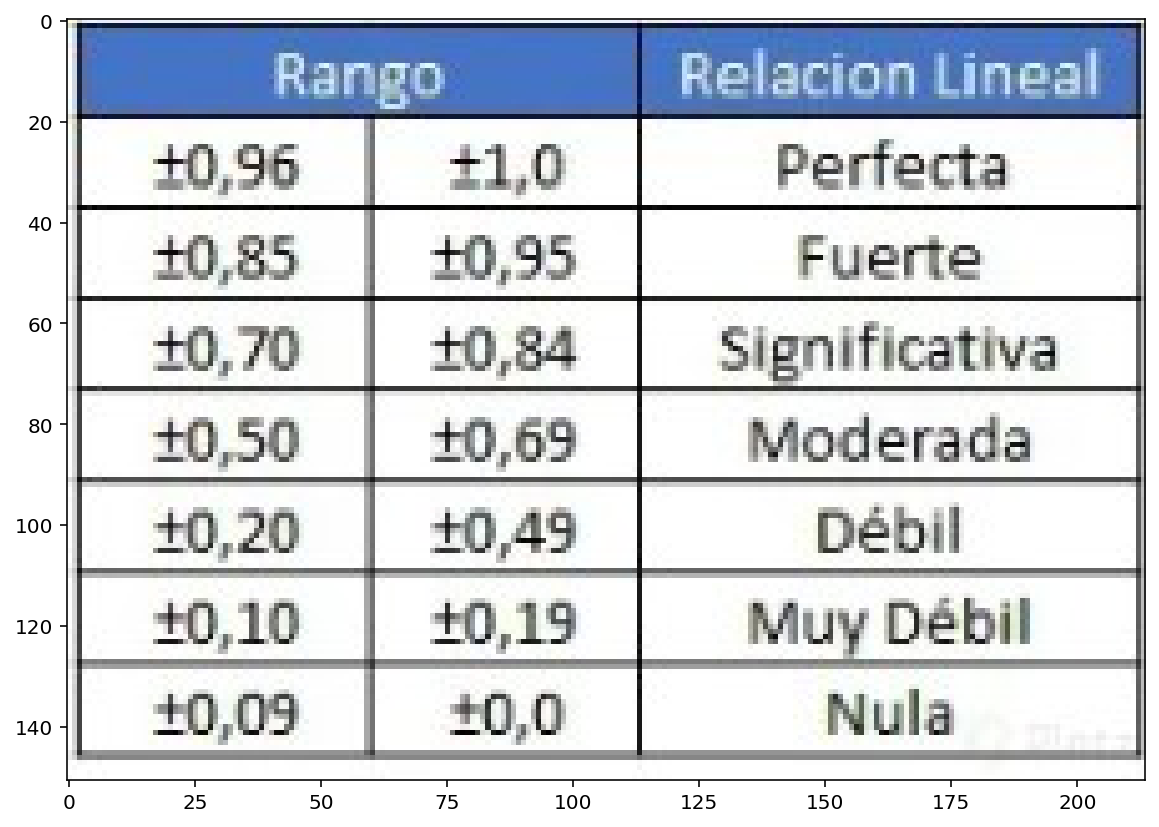

In [27]:
img=mpimg.imread('tabla.jpg')
imgplot = plt.imshow(img)
plt.show()